In [1]:
import pandas as pd
import talib
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from datetime import datetime
import time
import sqlite3

In [24]:
import connectorx as cx

In [21]:
import datafunc; reload(datafunc)
import functions; reload(functions)
from datafunc import *
from functions import *

In [7]:
conn = sqlite3.connect('main.db')
c = conn.cursor()

In [25]:
df = cx.read_sql('sqlite://main.db', get_top_stocks())

In [28]:
df['date'] = df['time'].apply(date_from_timestamp)

In [29]:
df.date.min()

'2023-01-03'

In [12]:
year = df[(df['date'] > '2024-01-01') & (df['date'] <= '2024-05-31')]

In [15]:
year.shape

(1101539, 9)

In [32]:
df['return'] = df['close'].groupby(df['ticker']).pct_change()
df['cumret'] = df.groupby('ticker')['return'].transform(lambda x: (1 + x).cumprod())

In [6]:
top = df[df['rank'] <= 5000].copy()
recent = top[top['date'] >= '2023-01-01'].copy()

In [24]:
recent['cumret'] = recent.groupby('ticker')['return'].transform(lambda x: (1 + x).cumprod())

In [ ]:
df['crosses'] = df.groupby('ticker').close.transform(get_crossings)
df['crosses5'] = df.groupby('ticker').close.transform(lambda x: get_crossings(x, ma=5))
df['crosses15'] = df.groupby('ticker').close.transform(lambda x: get_crossings(x, ma=15))
df['crosses30'] = df.groupby('ticker').close.transform(lambda x: get_crossings(x, ma=30))

In [33]:
recent['crosses'] = recent.groupby('ticker').close.transform(get_crossings)
recent['crosses5'] = recent.groupby('ticker').close.transform(lambda x: get_crossings(x, ma=5))
recent['crosses15'] = recent.groupby('ticker').close.transform(lambda x: get_crossings(x, ma=15))
recent['crosses30'] = recent.groupby('ticker').close.transform(lambda x: get_crossings(x, ma=30))

In [34]:
between = get_between(df)

In [35]:
between['std'] = between.groupby('ticker')['return'].transform(lambda x: x.std())
between['stddev'] = between['std'].transform(normalize)
between['crossnorm'] = between['crosses'].transform(normalize)

In [41]:
between['score'] = np.sqrt(0.3*between['stddev']**2 + between['crossnorm']**2)

In [42]:
between.groupby('ticker')['score'].mean().nlargest(10)

ticker
WKHS     19.096363
AISP      5.485983
VVPR      4.581225
RGS       4.463832
BNDX      3.903491
SPSK      3.696236
KNG       3.585926
JPMpC     3.488981
HLN       3.265388
RZC       3.178604
Name: score, dtype: float64

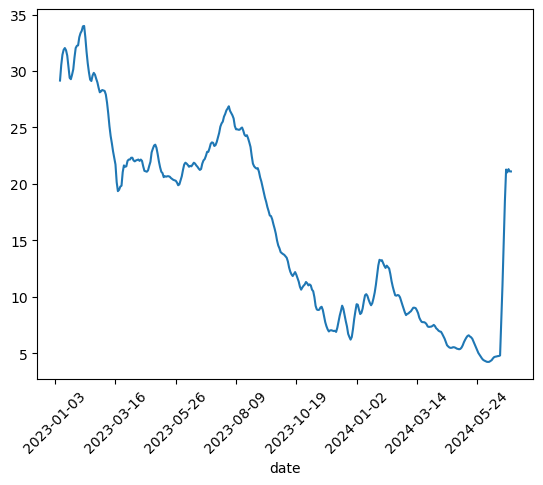

In [45]:
plot(df, 'rgs')

In [ ]:
# RZC, HLN, KNG, DGICA, BNDX, CHSCL, CHSCM, HON, GNR, AB, SLCA